
## Project 1 (Introduction to DL)
**Wine Classification with TensorFlow**

 ### CS672 CRN 74071



Project Member
*   Rasika Gulhane




## Install Libraries and Load DataSet

In [ ]:
! pip install -q tensorflow_data_validation[visualization]
! pip install --upgrade pyarrow
! pip install --upgrade pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.5/22.5 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip install ucimlrepo

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

X = wine.data.features
y = wine.data.targets

import pandas as pd
df = pd.concat([X,y], axis= 1)
df



,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


### EDA

In [ ]:
column_names = df.columns
print(column_names.value_counts().sum())

14


In [ ]:
# CHECK MISSING VALUES:
df.isna().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

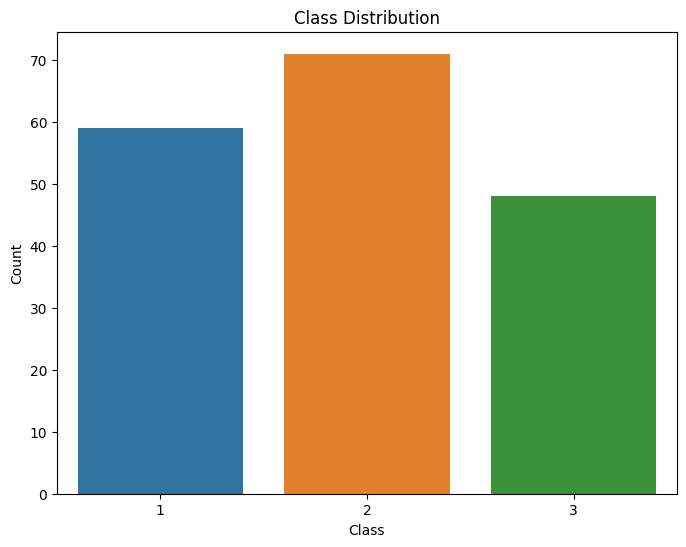

Class 2: 39.89%
Class 1: 33.15%
Class 3: 26.97%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'data' with a 'class' column
class_distribution = df['class'].value_counts()
class_labels = class_distribution.index
class_counts = class_distribution.values

# Calculate class proportions
class_proportions = class_counts / len(df)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Print class proportions
for label, proportion in zip(class_labels, class_proportions):
    print(f"Class {label}: {proportion*100:.2f}%")


In [ ]:
import tensorflow_data_validation as tfdv

# Generate statistics from your DataFrame
statistics = tfdv.generate_statistics_from_dataframe(df)


In [ ]:
# Check any anamolies
# Infer a schema for your data
schema = tfdv.infer_schema(statistics)
tfdv.display_schema(schema=schema)

# Validate statistics against the schema and display anomalies
anomalies = tfdv.validate_statistics(statistics, schema)

tfdv.display_anomalies(anomalies)

,Type,Presence,Valency,Domain
Feature name,,,,
'Alcohol',FLOAT,required,,-
'Malicacid',FLOAT,required,,-
'Ash',FLOAT,required,,-
'Alcalinity_of_ash',FLOAT,required,,-
'Magnesium',INT,required,,-
'Total_phenols',FLOAT,required,,-
'Flavanoids',FLOAT,required,,-
'Nonflavanoid_phenols',FLOAT,required,,-
'Proanthocyanins',FLOAT,required,,-


In [ ]:
visuals= tfdv.visualize_statistics(statistics)
visuals

In [ ]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [ ]:
column_names

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

<Axes: >

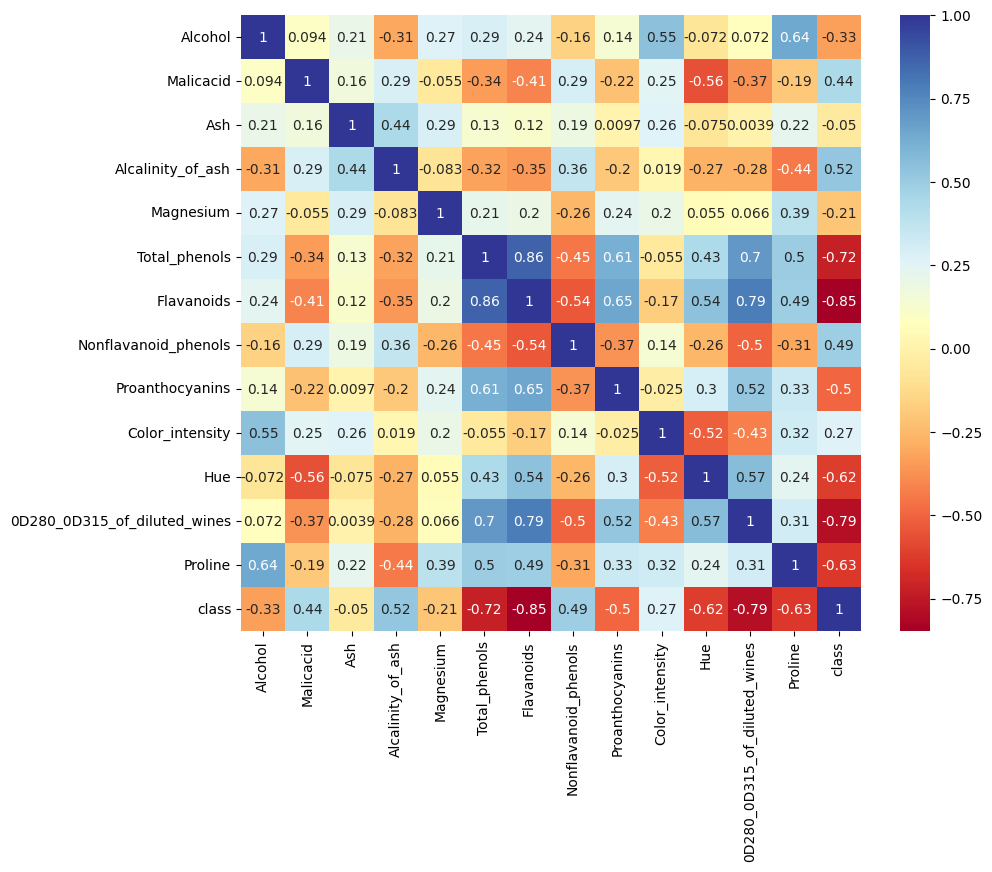

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[10,8])
sns.heatmap(df.corr(), annot= True, cmap='RdYlBu')

<Axes: >

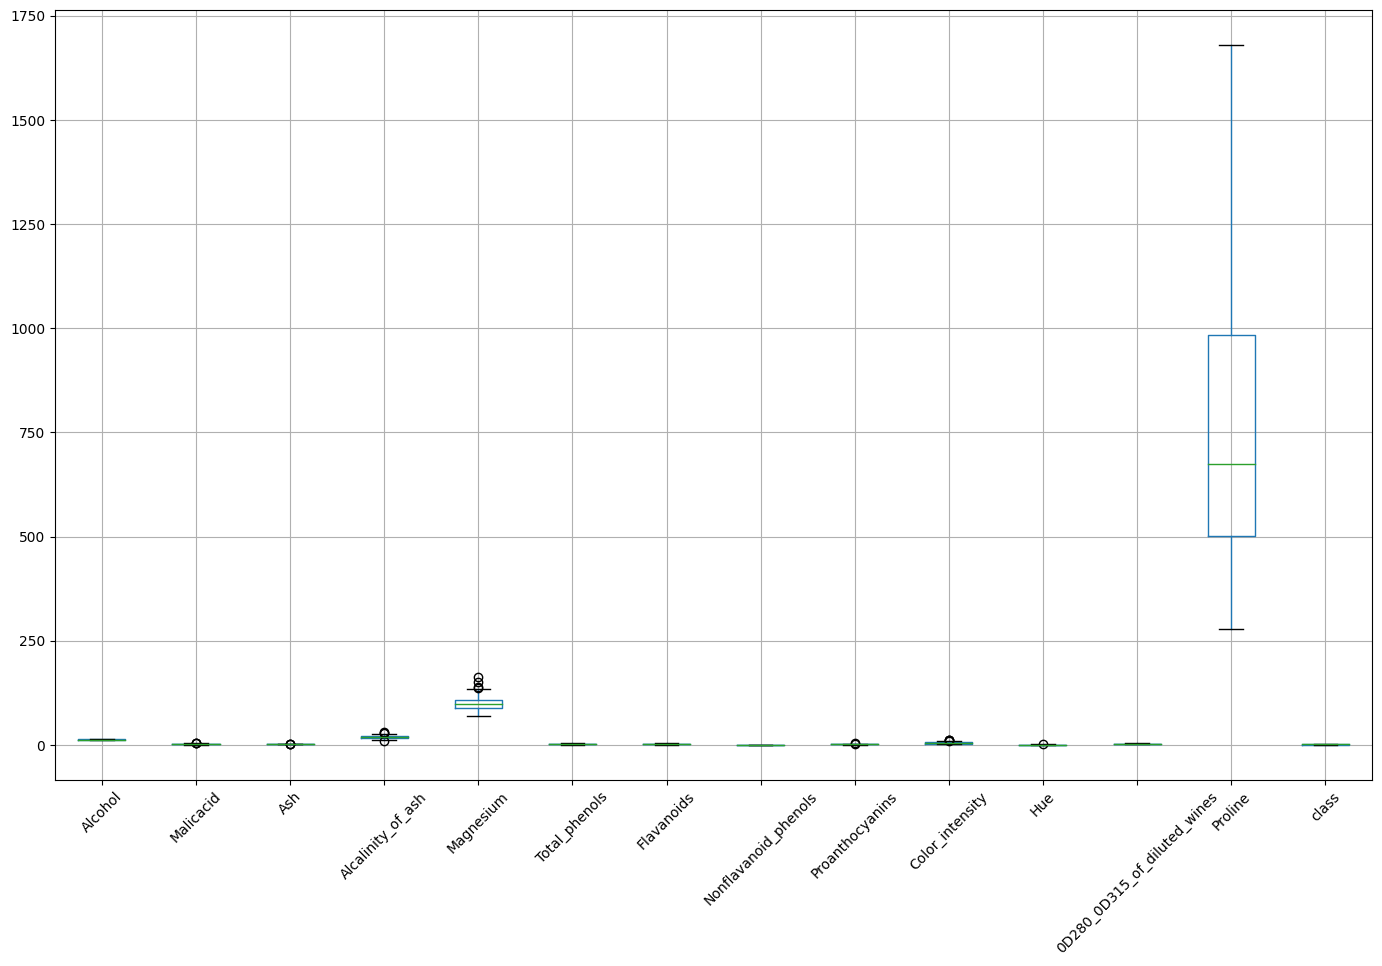

In [ ]:
#To check the data distribution

df.boxplot(grid=True, rot=45, fontsize=10, figsize=(17,10))

In [ ]:
# Discrete Columns
dis_cols_1 = ['class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity_of_ash',
    'Magnesium',
    'Total_phenols',
    'Flavanoids']

dis_cols_1 = ['Nonflavanoid_phenols',
    'Proanthocyanins',
    'Color_intensity',
    'Hue',
    '0D280_0D315_of_diluted_wines',
    'Proline']

def discreteGraph(dis_cols):
    fig = plt.figure(figsize = (180, 60))

    index = 1
    for col in dis_cols:
        plt.subplot(3, 2, index)
        sns.countplot(x=col, data=df)
        index += 1
    plt.tight_layout()
    plt.show()

In [ ]:
discreteGraph(dis_cols_1)

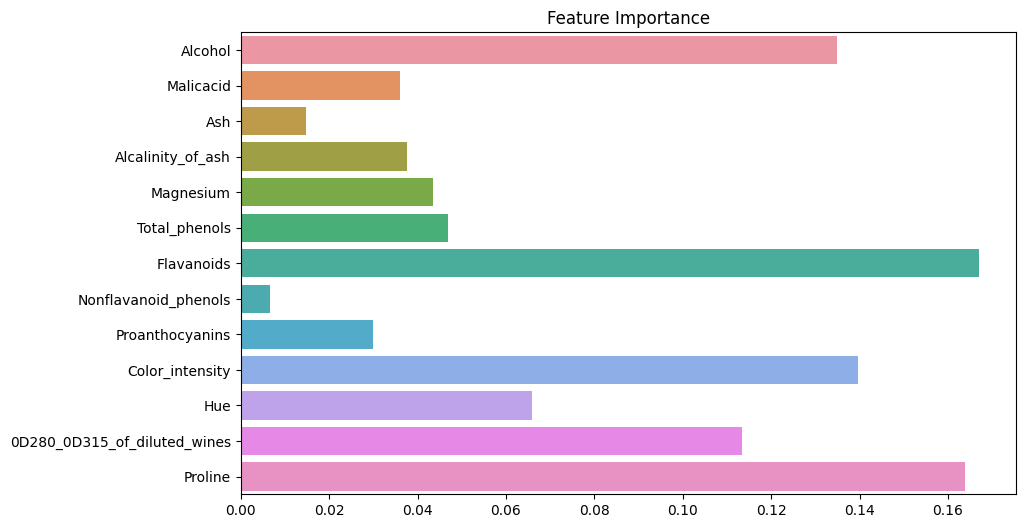

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("class", axis=1)
y = df["class"]

# Create a RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)

# Feature importance scores
feature_importance = rf.feature_importances_

# Create a bar plot to display feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.show()


## Data frame

In [ ]:
print(X.head())
print(y.head())

   Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0                        

## Why encoding
Converting labels encoding is not always necessary in all situations,
 but it's a common practice in deep learning for multi-class classification to ensure that the model can effectively learn and predict class probabilities.
  If you are using other types of models or loss functions, you may not need to use one-hot encoding, but in most cases, it simplifies the training process.

In [ ]:
# label encoding to target variable

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Normalize X data

In [ ]:
#normalize given data uisng MinMaxScaler() method from sklearn.preprocessing package


from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

## Split dataset in 80:20 ratio

In [ ]:
#Spliting dataset into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

Further split the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## MODEL

Model using both optimizer on 50 epochs for different LR

In [ ]:
from tensorflow import keras


## Using ADAM optimizer

### trial LR with Adam Optimizer

In [ ]:
for i in [0.1, 0.01, 0.001, 0.0001]:

  model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Three classes for wine type
  ])

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=i),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )
  print("LR", i)
  model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data = (X_test, y_test), verbose=0)
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {test_accuracy*100:.2f}%")
  print(" ")



LR 0.1
2/2 [==============================] - 0s 11ms/step - loss: 1.2060e-04 - accuracy: 1.0000
Test Accuracy: 100.00%
 
LR 0.01
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - accuracy: 1.0000
Test Accuracy: 100.00%
 
LR 0.001
2/2 [==============================] - 0s 7ms/step - loss: 0.0704 - accuracy: 1.0000
Test Accuracy: 100.00%
 
LR 0.0001
2/2 [==============================] - 0s 8ms/step - loss: 0.8533 - accuracy: 0.9444
Test Accuracy: 94.44%
 


The learning rate of 0.0001, which resulted in a test accuracy of 94.4%, may be more appropriate because it is less likely to lead to overfitting. This learning rate allows the model to learn more gradually and find a better generalization of the data.

### trial epochs with ADAM optimizer

In [ ]:
# Train the model with different numbers of epochs
epochs_list = [100, 500, 1000, 2000]
history_list = []
test_accuracies = []

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


for j in epochs_list:

  model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Three classes for wine type
  ])

  model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )


  print("Epochs", j)
  history = model.fit(X_train, y_train, epochs=j, batch_size=32, validation_data = (X_test, y_test), verbose=0, callbacks = early_stopping_cb )
  test_loss, test_accuracy = model.evaluate(X_test, y_test)

  print(f"Test Accuracy: {test_accuracy*100:.2f}%")
  print(" ")

  history_list.append(history)
  test_accuracies.append(test_accuracy)





Epochs 100
2/2 [==============================] - 0s 11ms/step - loss: 0.6179 - accuracy: 0.9444
Test Accuracy: 94.44%
 
Epochs 500
2/2 [==============================] - 0s 10ms/step - loss: 0.0703 - accuracy: 0.9722
Test Accuracy: 97.22%
 
Epochs 1000
2/2 [==============================] - 0s 9ms/step - loss: 0.0615 - accuracy: 1.0000
Test Accuracy: 100.00%
 
Epochs 2000
2/2 [==============================] - 0s 8ms/step - loss: 0.0580 - accuracy: 1.0000
Test Accuracy: 100.00%
 


### Loss vs Accuracy Curve

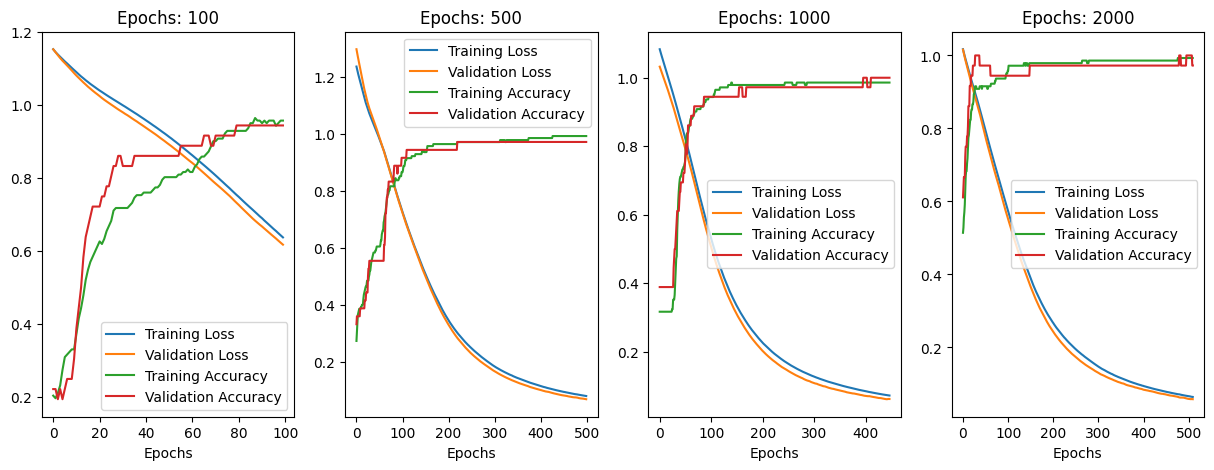

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(15, 5))
for j, history in enumerate(history_list):
    plt.subplot(1, len(history_list), j + 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Epochs: {epochs_list[j]}')
    plt.xlabel('Epochs')
    plt.legend()

plt.show()

Models trained with 100 epochs have test accuracies of 94.89% and show overfitting, as the **training loss is significantly lower than the validation loss**.

Based on these results, the models trained with 500 and 1000 epochs are performing better, as they have achieved perfect test accuracy without overfitting. These models are likely to generalize well to new, unseen data.

Models trained with 500, 1000, 2000 epochs have test accuracies of 100.00% and exhibit consistent improvement in training and validation loss.

### confusion matrix

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

     Class 1       0.93      1.00      0.97        14
     Class 2       0.93      0.93      0.93        14
     Class 3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



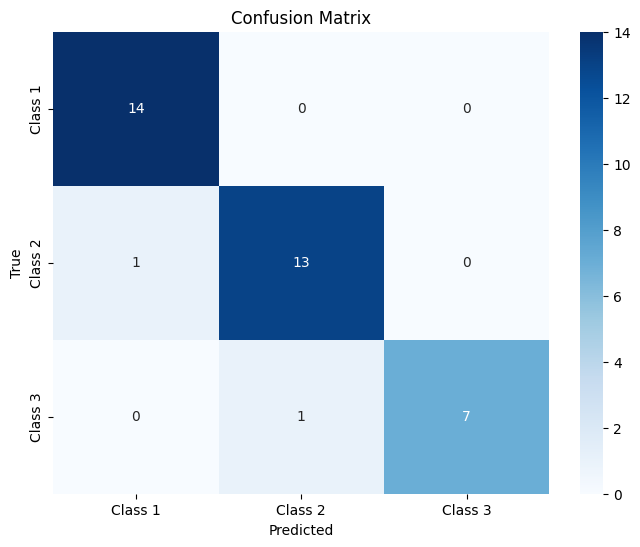

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Choose the model with the best performance (e.g., 500 or 1000 epochs)
model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with the chosen number of epochs
chosen_epochs = 100  # Choose either 500 or 1000
model.fit(X_train, y_train, epochs=chosen_epochs, batch_size=32, verbose=0)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate precision and recall for each class
report = classification_report(y_test, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3'], output_dict=True)
print(classification_report(y_test, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3']))

# Visualize the confusion matrix using a heatmap
class_labels = ['Class 1', 'Class 2', 'Class 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Using SGD optimizer

### trial LR with SGD optimizer

In [ ]:
for i in [0.1, 0.01, 0.001, 0.0001]:

  model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Three classes for wine type
  ])

  model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=i),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )
  print("LR", i)
  model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data = (X_test, y_test), verbose=0)
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {test_accuracy*100:.2f}%")
  print(" ")


LR 0.1
2/2 [==============================] - 0s 11ms/step - loss: 0.0373 - accuracy: 1.0000
Test Accuracy: 100.00%
 
LR 0.01
2/2 [==============================] - 0s 23ms/step - loss: 0.6407 - accuracy: 0.9722
Test Accuracy: 97.22%
 
LR 0.001
2/2 [==============================] - 0s 9ms/step - loss: 1.0575 - accuracy: 0.3889
Test Accuracy: 38.89%
 
LR 0.0001
2/2 [==============================] - 0s 10ms/step - loss: 1.1021 - accuracy: 0.3611
Test Accuracy: 36.11%
 


Based on the latest results, it's clear that a learning rate of 0.01 leads to the best test accuracy of 97.22%. Learning rates of 0.1, 0.001, and 0.0001 result in overfitting or poor generalization, as indicated by the lower test accuracies.


### trial epochs with SGD optimizer

In [ ]:
# Train the model with different numbers of epochs
epochs_list = [100, 500, 1000, 2000]
history_list = []
test_accuracies = []

In [ ]:
for j in epochs_list:

  model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Three classes for wine type
  ])

  model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

  print("Epochs", j)
  history = model.fit(X_train, y_train, epochs=j, batch_size=32, validation_data = (X_test, y_test), verbose=0)
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  print(f"Test Accuracy: {test_accuracy*100:.2f}%")
  print(" ")

  history_list.append(history)
  test_accuracies.append(test_accuracy)


Epochs 100
2/2 [==============================] - 0s 10ms/step - loss: 0.3340 - accuracy: 0.9722
Test Accuracy: 97.22%
 
Epochs 500
2/2 [==============================] - 0s 11ms/step - loss: 0.0369 - accuracy: 1.0000
Test Accuracy: 100.00%
 
Epochs 1000
2/2 [==============================] - 0s 10ms/step - loss: 0.0118 - accuracy: 1.0000
Test Accuracy: 100.00%
 
Epochs 2000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000
Test Accuracy: 100.00%
 


### Loss vs Accuracy Curve

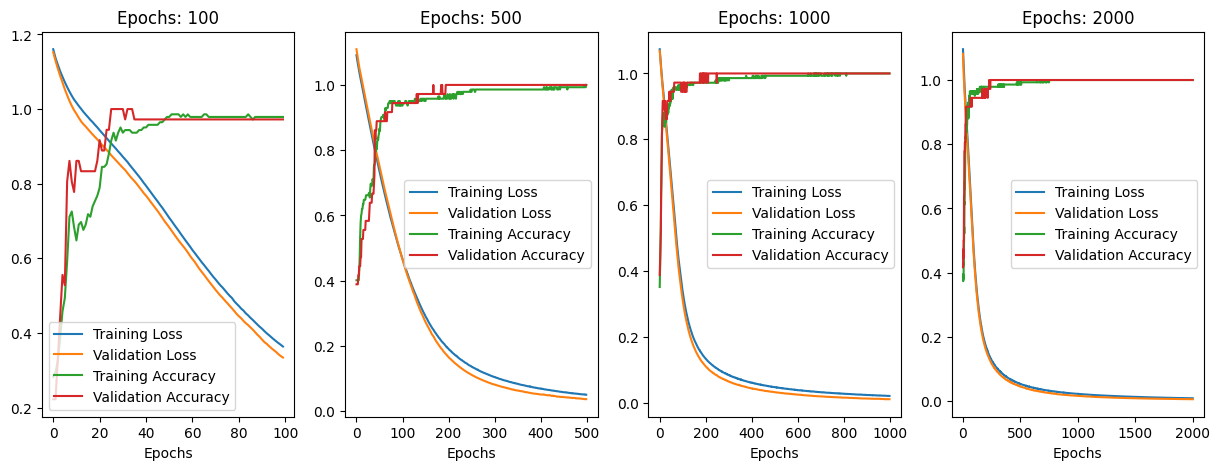

In [ ]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(15, 5))
for j, history in enumerate(history_list):
    plt.subplot(1, len(history_list), j + 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Epochs: {epochs_list[j]}')
    plt.xlabel('Epochs')
    plt.legend()

plt.show()

Models trained with 50 and 100 epochs have test accuracies of 97.27% and show overfitting, as the training loss is significantly lower than the validation loss.

Based on these results, the models trained with 500 and 1000 epochs are performing better, as they have achieved perfect test accuracy without overfitting. These models are likely to generalize well to new, unseen data.

Models trained with 500 and 1000 epochs have test accuracies of 100.00% and exhibit consistent improvement in training and validation loss.

### Confusion Matrix

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00        14
     Class 2       1.00      1.00      1.00        14
     Class 3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



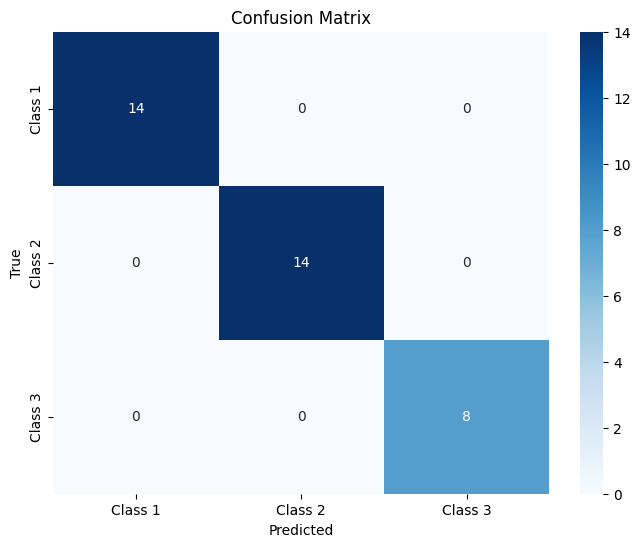

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the model with the best performance (e.g., 500 or 1000 epochs)
model = keras.Sequential([
    keras.layers.Input(shape=(13,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with the chosen number of epochs
chosen_epochs = 500
model.fit(X_train, y_train, epochs=chosen_epochs, batch_size=32, verbose=0)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Calculate precision and recall for each class
report = classification_report(y_test, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3'], output_dict=True)
print(classification_report(y_test, y_pred_classes, target_names=['Class 1', 'Class 2', 'Class 3']))

# Visualize the confusion matrix using a heatmap
class_labels = ['Class 1', 'Class 2', 'Class 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
""

## Conclusion:
Adam:
Models trained with 100 epochs have test accuracies of 97.27% and show overfitting, as the training loss is significantly lower than the validation loss.

Based on these results, the models trained with 500 and 1000 epochs are performing better, as they have achieved perfect test accuracy without overfitting. These models are likely to generalize well to new, unseen data.

Models trained with 500 and 1000 epochs have test accuracies of 100.00% and exhibit consistent improvement in training and validation loss.
#

SGD:
Models trained 100 epochs have test accuracies of 97.27% and show overfitting, as the training loss is significantly lower than the validation loss.

Based on these results, the models trained with 500 and 1000 epochs are performing better, as they have achieved perfect test accuracy without overfitting. These models are likely to generalize well to new, unseen data.

Models trained with 500 and 1000 epochs have test accuracies of 100.00% and exhibit consistent improvement in training and validation loss.

#

**Based on these results, SGD works 100 epochs and 0.01 LR best with high accuracy and in terms of training and validation loss is lower**
